In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
sv = pd.read_csv('US_Accidents_Dec19.csv')

In [3]:
sv.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
sv.astype('category')

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
sv.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

#### Dropping some columns which are not required and handling missing values

In [6]:
sv_main=sv.drop(columns=['ID','Source','End_Lat','TMC','End_Lng','Number','Wind_Chill(F)','Zipcode','Country','Timezone','Airport_Code','Wind_Direction','Weather_Timestamp','Temperature(F)','Humidity(%)','Pressure(in)','Precipitation(in)'])

In [7]:
sv_main['City']=sv_main['City'].fillna("Unknown")
sv_main['Sunrise_Sunset']=sv_main['Sunrise_Sunset'].fillna("Unknown")
sv_main['Civil_Twilight']=sv_main['Civil_Twilight'].fillna("Unknown")
sv_main['Nautical_Twilight']=sv_main['Nautical_Twilight'].fillna("Unknown")
sv_main['Astronomical_Twilight']=sv_main['Astronomical_Twilight'].fillna("Unknown")
sv_main['Weather_Condition']=sv_main['Weather_Condition'].fillna("Unknown")
sv_main['Visibility(mi)'].fillna(sv_main['Visibility(mi)'].median(), inplace=True)
sv_main['Wind_Speed(mph)'].fillna(sv_main['Wind_Speed(mph)'].median(), inplace=True)


sv_main=sv_main[sv_main.City != "Unknown"]
sv_main=sv_main[sv_main.Sunrise_Sunset != "Unknown"]
sv_main=sv_main[sv_main.Civil_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Nautical_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Astronomical_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Weather_Condition != "Unknown"]

In [8]:
sv_main

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,Dayton,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,Reynoldsburg,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,...,False,False,False,False,False,False,Night,Day,Day,Day
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,...,False,False,False,False,True,False,Day,Day,Day,Day
5,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,Westerville,...,False,False,False,False,False,False,Day,Day,Day,Day
6,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,R,Dayton,...,False,False,False,False,False,False,Day,Day,Day,Day
7,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,0.010,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,R,Dayton,...,False,False,False,False,False,False,Day,Day,Day,Day
8,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,0.000,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,L,Dayton,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.010,Right hand shoulder blocked due to accident on...,Westerville Rd,R,Westerville,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
sv_main.to_csv('Severity_data_group6.csv', index=False)

In [10]:
new_sv = sv[['ID','Severity','Start_Time','Side','City','County','State','Visibility(mi)','Weather_Condition']]

In [11]:
new_sv

,ID,Severity,Start_Time,Side,City,County,State,Visibility(mi),Weather_Condition
0,A-1,3,2016-02-08 05:46:00,R,Dayton,Montgomery,OH,10.0,Light Rain
1,A-2,2,2016-02-08 06:07:59,L,Reynoldsburg,Franklin,OH,10.0,Light Rain
2,A-3,2,2016-02-08 06:49:27,R,Williamsburg,Clermont,OH,10.0,Overcast
3,A-4,3,2016-02-08 07:23:34,R,Dayton,Montgomery,OH,9.0,Mostly Cloudy
4,A-5,2,2016-02-08 07:39:07,R,Dayton,Montgomery,OH,6.0,Mostly Cloudy
5,A-6,3,2016-02-08 07:44:26,R,Westerville,Franklin,OH,7.0,Light Rain
6,A-7,2,2016-02-08 07:59:35,R,Dayton,Montgomery,OH,7.0,Overcast
7,A-8,3,2016-02-08 07:59:58,R,Dayton,Montgomery,OH,7.0,Overcast
8,A-9,2,2016-02-08 08:00:40,L,Dayton,Montgomery,OH,5.0,Mostly Cloudy
9,A-10,3,2016-02-08 08:10:04,R,Westerville,Franklin,OH,3.0,Light Rain


C:\Users\honey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


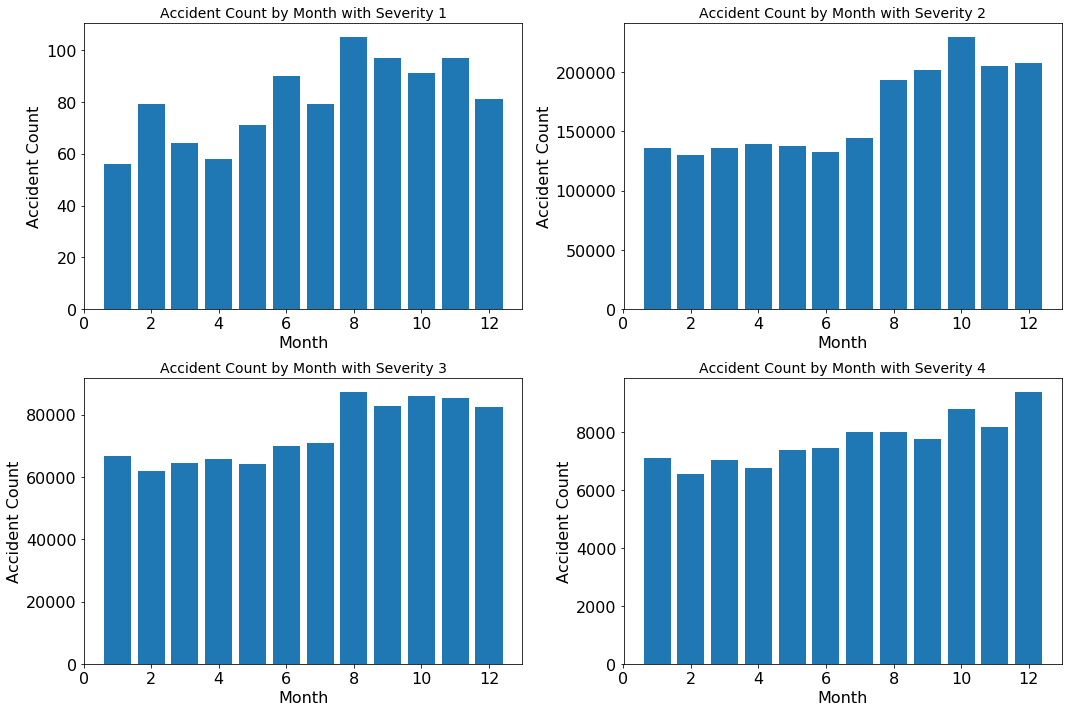

In [12]:
new_sv['time'] = pd.to_datetime(new_sv.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(new_sv.loc[new_sv["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

#### From the above bar plot,it can be inferred that the months October, November and December have highest number of accidents recorded consistently. It could be because of Thanksgiving, BlackFriday and Christmas vacations.

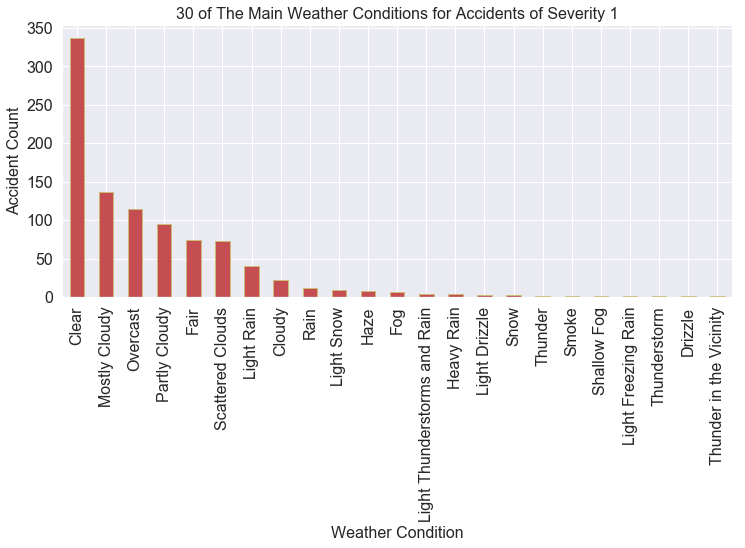

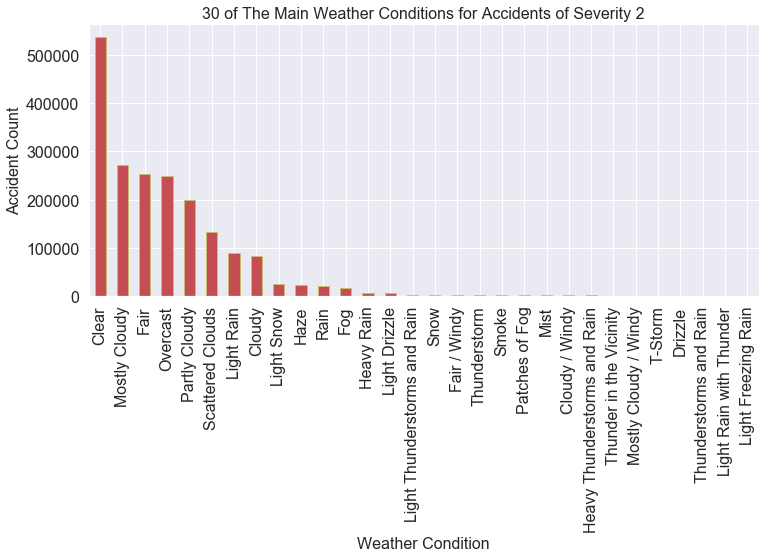

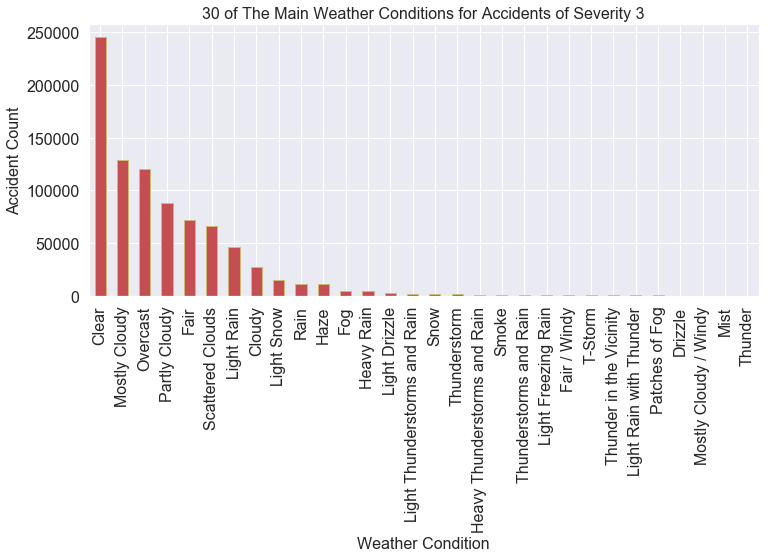

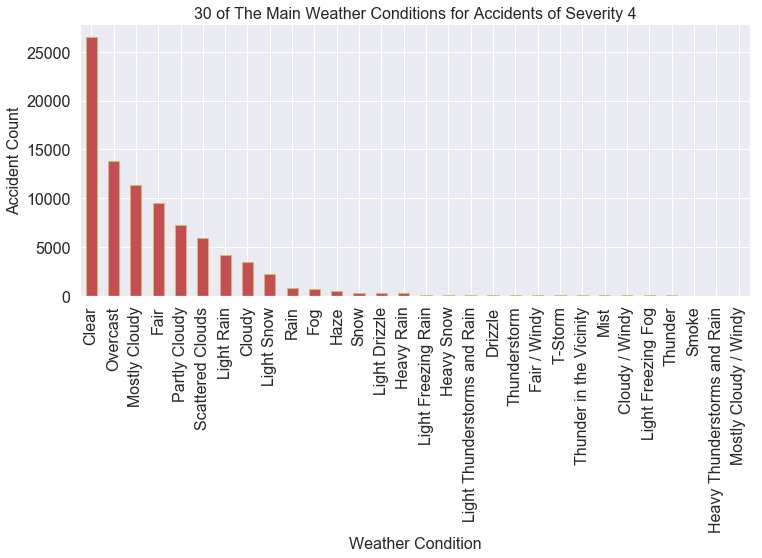

In [13]:
sns.set()
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    new_sv.loc[new_sv["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='r',edgecolor='y',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('30 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

#### From the above plots, we can observe irrespective of severity, most of the accidents happened in clear weather conditions followed by light rain and snowy. As we know rain and snow causes tires to skid which may be reason for accidents. But the accidents in clear weather conditions proves that other factors like roads, signals, drivers experience are playing major role.

In [14]:
sv_main['Start_Time'] = pd.to_datetime(sv_main['Start_Time'], infer_datetime_format=True)
sv_main['Day_of_Week'] = sv_main['Start_Time'].dt.day_name()

In [15]:
sv_main[[ 'Start_Time', 'Day_of_Week']].head()

,Start_Time,Day_of_Week
0,2016-02-08 05:46:00,Monday
1,2016-02-08 06:07:59,Monday
2,2016-02-08 06:49:27,Monday
3,2016-02-08 07:23:34,Monday
4,2016-02-08 07:39:07,Monday


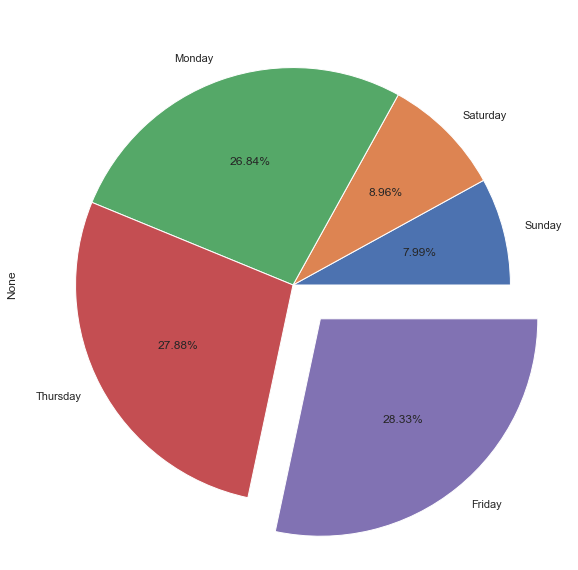

In [16]:
plt.figure(figsize=(16,10))
sv_main.groupby('Day_of_Week') \
        .size() \
        .sort_values(ascending = True) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0,0,0.2],autopct='%1.2f%%')
plt.ioff()

#### We can see that Monday, Thursday and friday reported more accidents which are peak days of the week. Friday being weekend start day, reports highest number of accidents may be due to rash driving after parties or rush to go home/vacations etc., However sunday and saturday reports lowest cases as they are rest days.

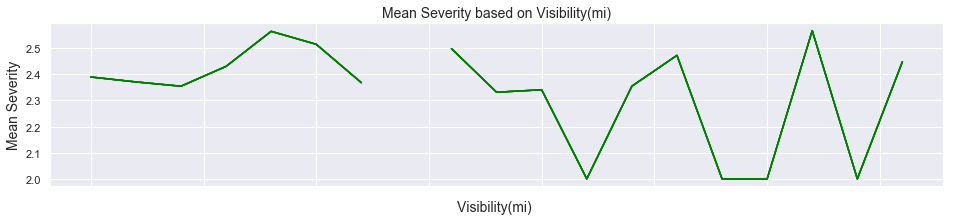

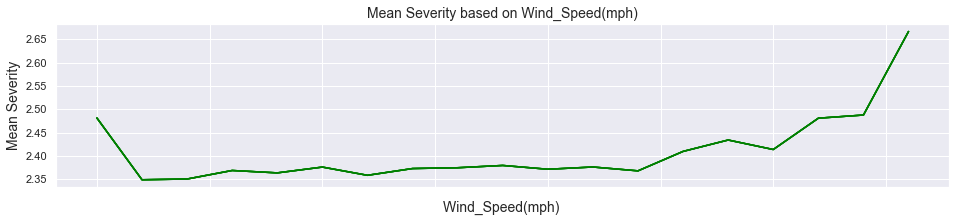

In [17]:
sns.set()
weather_factor = [ 'Visibility(mi)', 'Wind_Speed(mph)']

for factor in weather_factor:
   
    mini = sv_main[factor].quantile(q=0.0001)
    maxi = sv_main[factor].quantile(q=0.9999)
    
    plt.subplots(figsize=(16,3))
    for s in np.arange(1,5):
        sv_main["Severity"].groupby(pd.cut(sv_main[factor], np.linspace(mini,maxi,num=20))).mean().plot(color=['green'])
        plt.title("Mean Severity based on " + factor, fontsize=14)
        plt.xlabel(factor + " ", fontsize=14)
        plt.ylabel("Mean Severity", fontsize=14)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

#### Here, increasing windspeed(mph) causes accidents of severity 2, which implies even wind speed is also not the major factor for severity 4 accidents.

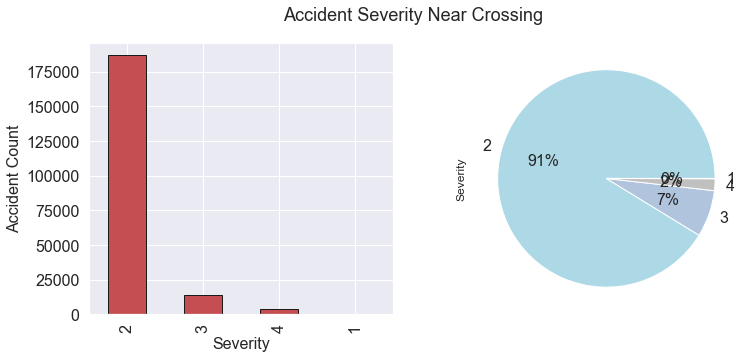

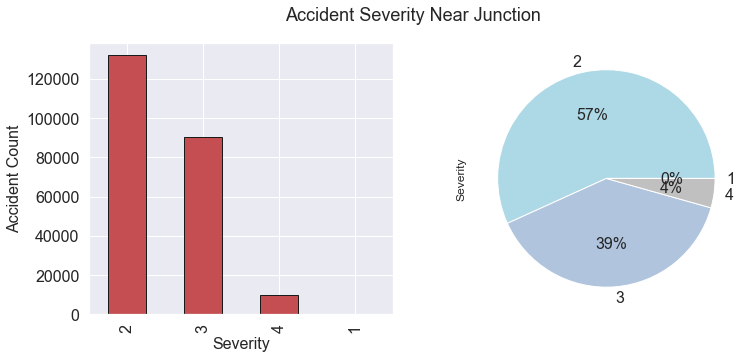

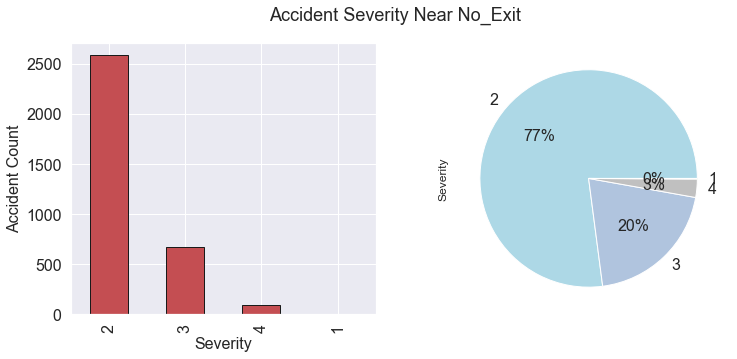

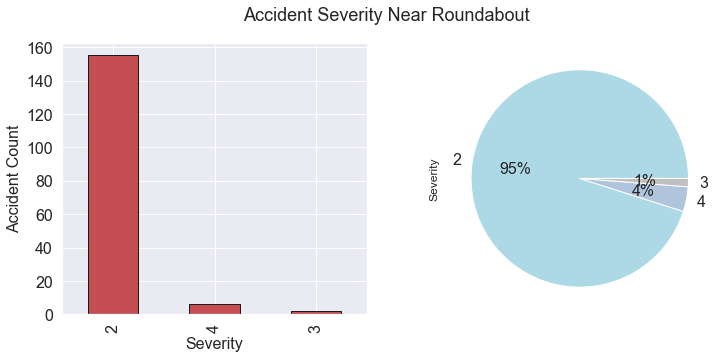

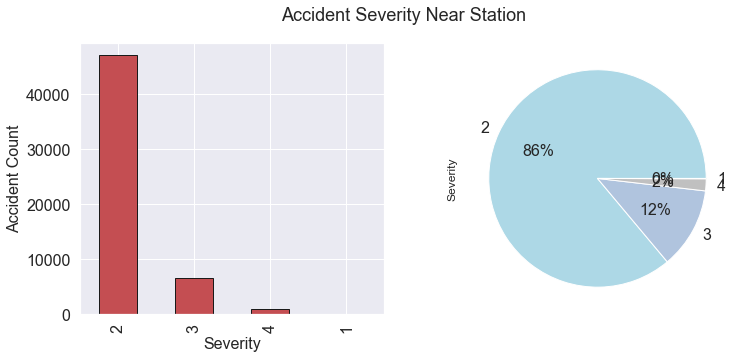

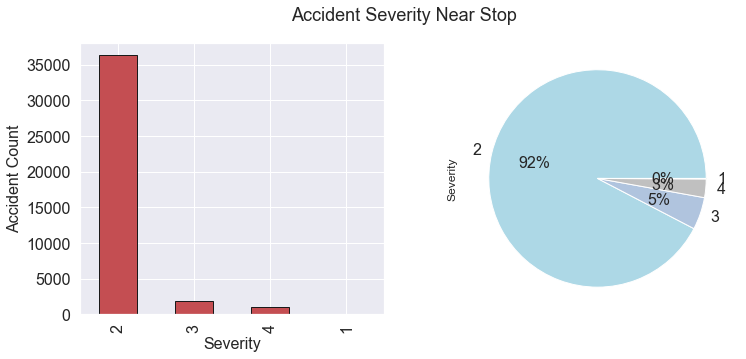

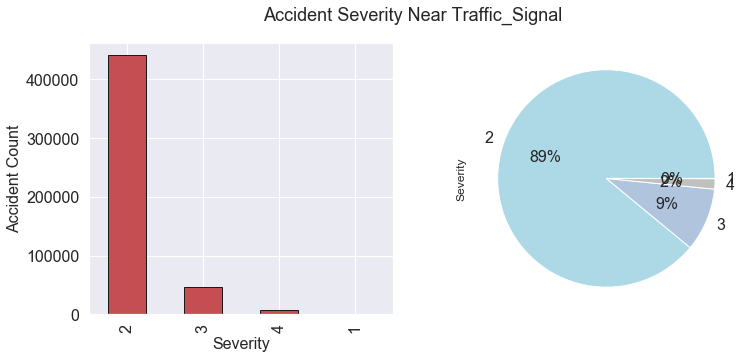

In [18]:
for area in ['Crossing','Junction', 'No_Exit','Roundabout', 'Station', 'Stop', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (sv_main[area] == True).sum() > 0:
        my_colors = ['lightblue','lightsteelblue','silver','green']
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + area,fontsize=18)
        plt.subplot(1,2,1)
        sv_main.loc[sv_main[area] == True]['Severity'].value_counts().plot.bar(width=0.5,color='r',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        sv_main.loc[sv_main[area] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16,colors=my_colors)

#### From this we can see that, severity 4 accidents are mostly happened near Junctions, No_exits. Approximately 176000 accidents recorded near junctions and more than 600000 accidents recorded near traffic signal which are highest cases. In the dashboard graphs we can see that absence of traffic signal or people violating rules are major reasons for these accidents.

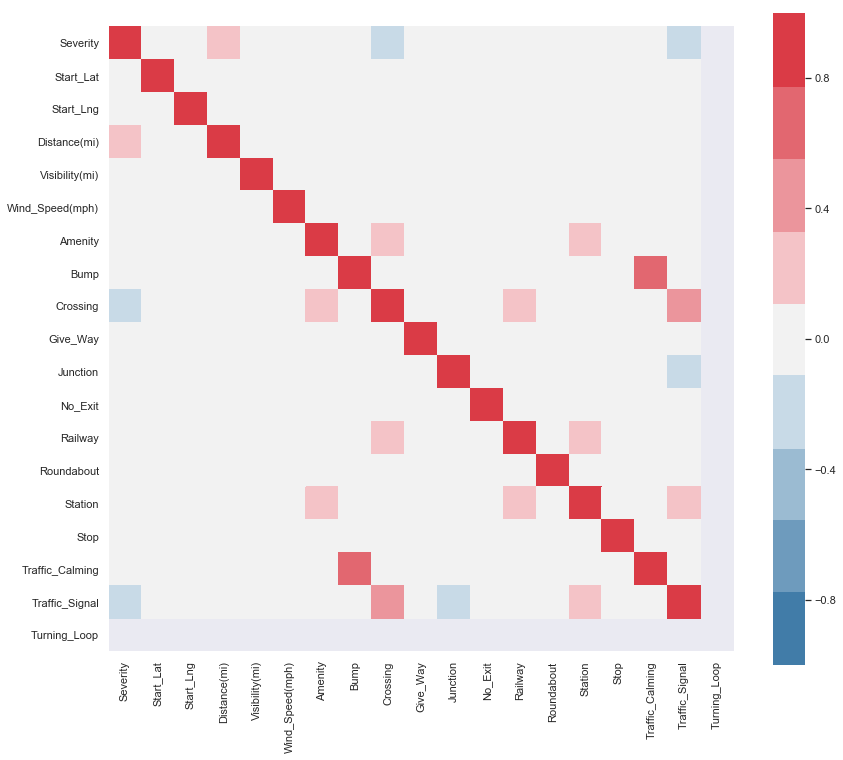

In [19]:
plt.rcParams['figure.figsize'] = (14,12)
sns.heatmap(sv_main.corr(), vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.show()

In [28]:
cor = sv_main.corr()

#Correlation with output variable
cor_target = abs(cor["Severity"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.02]
relevant_features

Severity           1.000000
Start_Lat          0.047455
Start_Lng          0.052533
Distance(mi)       0.146393
Wind_Speed(mph)    0.026446
Amenity            0.049047
Crossing           0.129464
Junction           0.063853
Railway            0.024731
Station            0.051875
Stop               0.055418
Traffic_Signal     0.195909
Name: Severity, dtype: float64

In [29]:
imp_features =["Severity","Start_Lat","Start_Lng","Distance(mi)","Wind_Speed(mph)","Amenity","Crossing","Junction","Railway","Station","Stop","Traffic_Signal"]

In [30]:
df_copy1 = sv_main.filter(imp_features, axis=1)

In [31]:
from sklearn.model_selection import train_test_split
y_data = df_copy1['Severity'].values
X_data = df_copy1.drop('Severity', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)
X_train.shape

(1948576, 11)

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train,y_train)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), df_copy1.columns))) 

Features sorted by their rank:
[(1, 'Station'), (2, 'Stop'), (3, 'Wind_Speed(mph)'), (4, 'Amenity'), (5, 'Railway'), (6, 'Crossing'), (7, 'Start_Lng'), (8, 'Junction'), (9, 'Distance(mi)'), (10, 'Severity'), (11, 'Start_Lat')]


In [34]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.0676964632585828

In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,2,2.368670
1,3,2.441249
2,2,2.374875
3,2,2.136101
4,2,2.364655
5,2,2.392018
6,2,2.170561
7,2,2.342362
8,2,2.379468
9,2,2.147954


In [36]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.45069359111625
Mean Squared Error: 0.27232720852879366
Root Mean Squared Error: 0.5218497949877854


In [42]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)


C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

In [83]:
print("Accuracy for Logistic Regression :", results.mean())

Accuracy for Logistic Regression : 0.6737355888672301


In [37]:
bool_features = df_copy1.select_dtypes(include=['bool'])
print('Boolean features: {}'.format(bool_features.shape))
one_hot = pd.get_dummies(bool_features)
one_hot.reset_index(drop=True, inplace=True)
one_hot.head(5)

Boolean features: (2908323, 7)


,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True


In [66]:
numerical_features =  df_copy1.select_dtypes(exclude=['bool'])
sc = StandardScaler()
y = df_copy1[['Severity']].values
y= sc.fit_transform(y)
numerical_features = numerical_features.drop(['Severity'], axis=1)
numerical_features = pd.DataFrame(sc.fit_transform(numerical_features), columns = numerical_features.columns)

C:\Users\honey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
X_data = np.concatenate((one_hot,numerical_features),axis=1)
df_concat = pd.concat([one_hot,numerical_features],axis=1)

In [71]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_data, y, test_size=0.2, random_state=42)
y_t=y_train1.ravel()
y_te=y_test1.ravel()

(2326658, 1)

In [44]:
! pip install windrose

In [45]:
! pip install lightgbm

In [53]:
import lightgbm as lgb

In [72]:

lgb_train = lgb.Dataset(X_train1, y_t)
lgb_test = lgb.Dataset(X_test1, y_te)

In [78]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': {'rmse'},
            'num_leaves': 13,
            'max_depth': -1,
          'learning_rate': 0.8,
          'feature_fraction': 0.041,
          'bagging_fraction': 0.331,
          'bagging_freq' : 5
          }

In [79]:

gbm_regress = lgb.train(params,
              lgb_train,
              num_boost_round=4000,
              valid_sets=(lgb_train, lgb_test),
            early_stopping_rounds=20,
            verbose_eval = 20)

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 0.918985	valid_1's rmse: 0.919582
[40]	training's rmse: 0.911125	valid_1's rmse: 0.91171
[60]	training's rmse: 0.907571	valid_1's rmse: 0.90835
[80]	training's rmse: 0.900423	valid_1's rmse: 0.901385
[100]	training's rmse: 0.899199	valid_1's rmse: 0.900229
[120]	training's rmse: 0.895498	valid_1's rmse: 0.896649
[140]	training's rmse: 0.895219	valid_1's rmse: 0.896465
[160]	training's rmse: 0.891183	valid_1's rmse: 0.892556
[180]	training's rmse: 0.89006	valid_1's rmse: 0.891557
[200]	training's rmse: 0.889462	valid_1's rmse: 0.891013
[220]	training's rmse: 0.888067	valid_1's rmse: 0.889693
[240]	training's rmse: 0.887323	valid_1's rmse: 0.888996
[260]	training's rmse: 0.886879	valid_1's rmse: 0.888609
[280]	training's rmse: 0.886713	valid_1's rmse: 0.888492
[300]	training's rmse: 0.88648	valid_1's rmse: 0.88823
[320]	training's rmse: 0.884492	valid_1's rmse: 0.886219
[340]	training's rmse: 0.884295	vali

In [80]:
y_pred=gbm_regress.predict(X_test1)

In [81]:
from sklearn.metrics import mean_squared_error

score = np.sqrt(mean_squared_error(y_test1, y_pred))
print("The Test RMSE score for our model:", score)

The Test RMSE score for our model: 0.8808124863655286
